In [24]:
# Assignment 20

# NLP : Natural Language Processing

# Naive Bayes classifier for sentiment analysis

In [25]:
import pandas as pd

df = pd.read_csv('blogs.csv')

df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [27]:
# checking for null values

df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [28]:
# checking for duplicate records 

df.duplicated().sum()

0

In [29]:
# character count

df['Data'].apply(len).sum()

4649956

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64


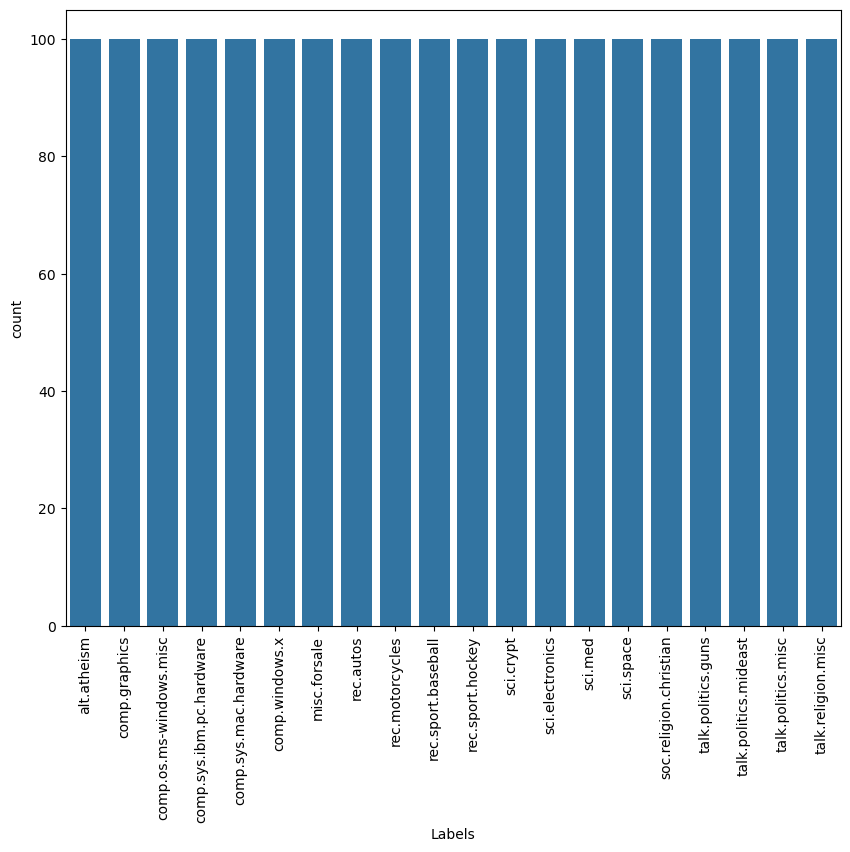

In [30]:
# class distribution

import matplotlib.pyplot as plt
import seaborn as sns

label_counts = df['Labels'].value_counts()
print(label_counts)

plt.figure(figsize=(10,8))
sns.countplot(x=df['Labels'])
plt.xticks(rotation=90)
plt.show()

In [31]:
# text preprocessing & tokenization

import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

stop_words = set(ENGLISH_STOP_WORDS)

def preprocess_text(text):
    text = text.lower()                            # lower casing
    
    text = re.sub(r'[^a-z\s]', '', text)           # removing punctuation, numbers and special chars
    
    tokens = text.split()
    
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]   # removing stopwords and words with lesser than 3 letters
    
    return " ".join(tokens)

df['clean_text'] = df['Data'].apply(preprocess_text)   # applying to data


print(df['clean_text'].head())


0    path cantaloupesrvcscmuedumagnesiumclubcccmued...
1    newsgroups altatheism path cantaloupesrvcscmue...
2    path cantaloupesrvcscmuedudasnewsharvardedunoc...
3    path cantaloupesrvcscmuedumagnesiumclubcccmued...
4    xref cantaloupesrvcscmuedu altatheism talkreli...
Name: clean_text, dtype: object


In [32]:
# dropping 'Data'

df.drop('Data',axis=1,inplace=True)

In [35]:
# train-test split

from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['Labels']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=38)

In [36]:
# vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # max_features = vocab size

X_train_vecs = vectorizer.fit_transform(X_train)
X_test_vecs = vectorizer.transform(X_test)

In [37]:
# model building

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train_vecs,y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [38]:
# prediction

y_pred = model.predict(X_test_vecs)

In [39]:
# measuring performance 

from sklearn.metrics import accuracy_score,classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8675

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.67      0.60      0.63        20
           comp.graphics       1.00      0.70      0.82        20
 comp.os.ms-windows.misc       0.77      0.85      0.81        20
comp.sys.ibm.pc.hardware       0.81      0.85      0.83        20
   comp.sys.mac.hardware       0.90      0.90      0.90        20
          comp.windows.x       0.90      0.95      0.93        20
            misc.forsale       0.83      0.95      0.88        20
               rec.autos       0.94      0.80      0.86        20
         rec.motorcycles       0.91      1.00      0.95        20
      rec.sport.baseball       0.89      0.80      0.84        20
        rec.sport.hockey       0.83      1.00      0.91        20
               sci.crypt       0.87      1.00      0.93        20
         sci.electronics       0.90      0.90      0.90        20
                 sci.med       0.

In [43]:
# sentiment analysis

from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.05:
        return "Positive"
    elif polarity < -0.05:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["clean_text"].apply(get_sentiment)

sentiment
Positive    1021
Neutral      593
Negative     386
Name: count, dtype: int64


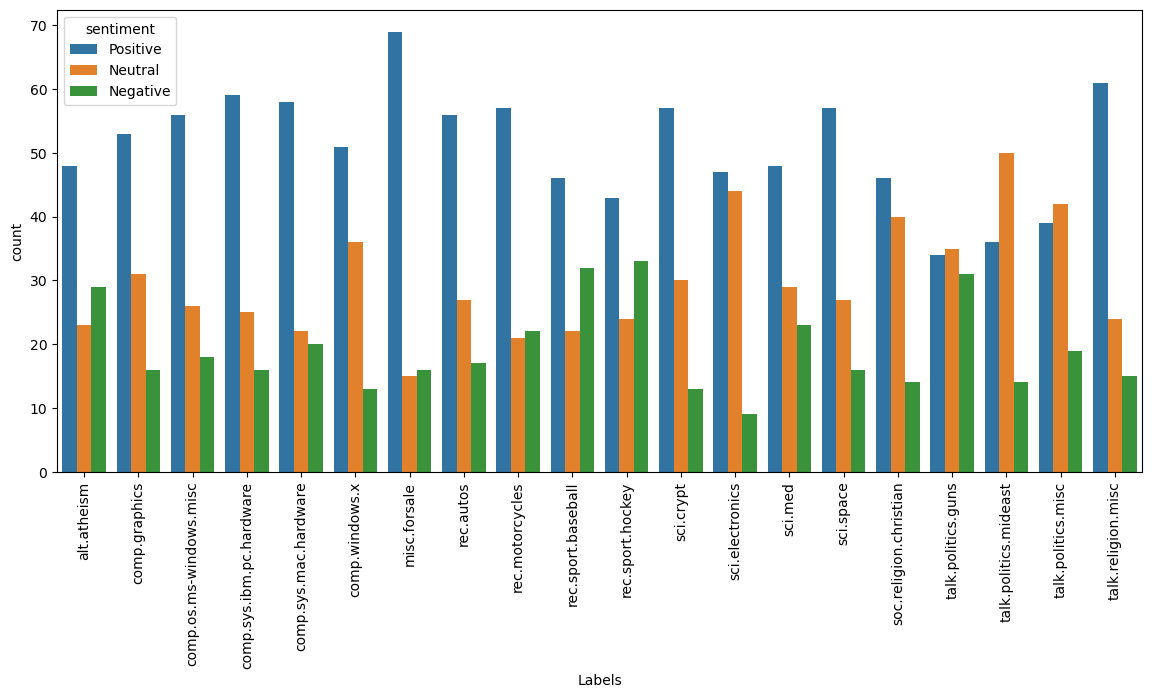

In [45]:
# sentiment distibution

print(df["sentiment"].value_counts())

plt.figure(figsize=(14,6))
sns.countplot(x=y, hue=df["sentiment"])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# model evaluation

from sklearn.metrics import acc